In [2]:
### working witht he irris data set....

In [1]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

In [2]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris


# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# print the names of the four features
print(iris.feature_names)

# print integers representing the species of each observation
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# check the types of the features and response
print(type(iris.data))
print(type(iris.target))
# check the shape of the features (first dimension = number of observations, second dimensions = number of features)
print(iris.data.shape)


# check the shape of the response (single dimension matching the number of observations)
print(iris.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


In [4]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [5]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=1)

print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [9]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
predictTrial = [[2,3,4,4]] # this is no longer a 1 d array [[stuff]]
knn.predict(predictTrial)

array([2])

In [15]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

In [16]:
# instantiate the model (using the value K=5)
knn_5 = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn_5.fit(X, y)

# predict the response for new observations
knn_5.predict(X_new)

array([1, 1])

### Using logistic regresstion 

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

array([2, 0])

#### the above is an out of dataset entry.. so one can not objectively evaluate whether the result is correct just by looking at the output

### Lesson 6 Pipelines: pandas and seaborn

In [21]:
import pandas as pd

In [22]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
# much coolness in the above LOC :) :D


# display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [26]:
data.shape

(200, 4)

In [28]:
import seaborn as sns

In [30]:
%matplotlib inline
# shows matplotlib op inline

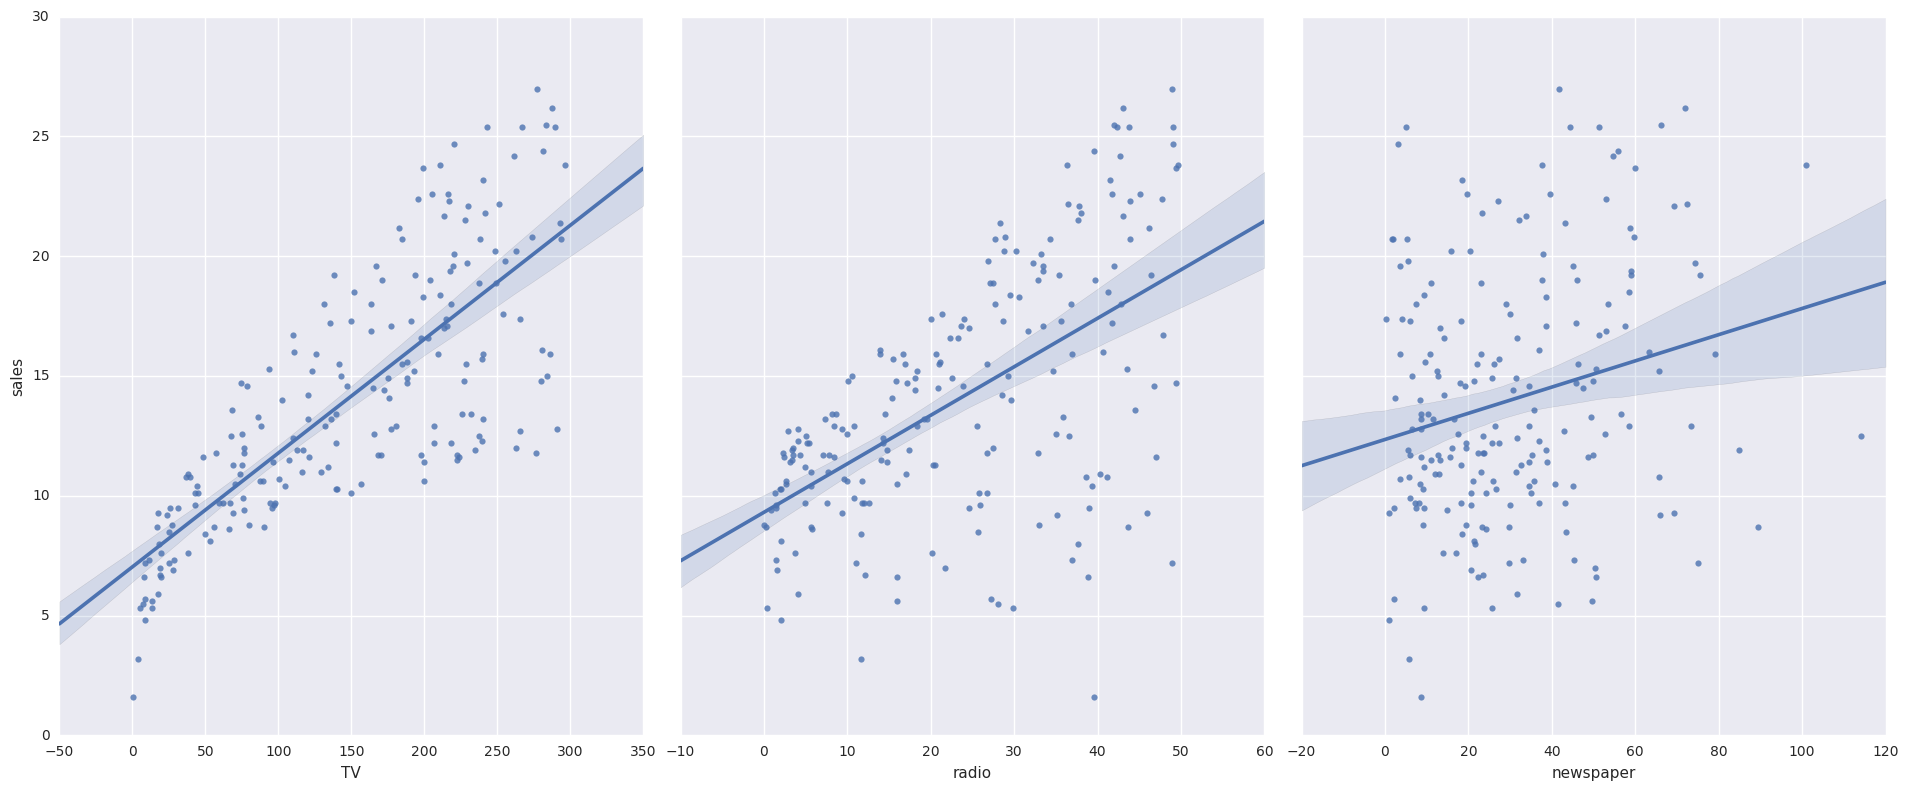

In [36]:
 #visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=8, aspect=0.8, kind='reg')
#case sensitive names must match the column headers observed

#### in SciKit the estimators are the Models, and there are various estimators 
refer cheat sheet..?

Scikit expects nd/numpy arrays..
pandas is built on top of numpy
x = > pandas dataframe and y => pandas Series

In [39]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [40]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [44]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
y = data.sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

###  splitting the X and y nd arrays in to testing and training sets
using train_test_spilt from sklearn.cross_validation

In [46]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [48]:
 #default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [50]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
#check out the model coeffs
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [53]:
list(zip(feature_cols,linreg.coef_))
#pairing feature names witht he coeffs

[('TV', 0.046564567874150281),
 ('radio', 0.17915812245088841),
 ('newspaper', 0.0034504647111804196)]

In [54]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

### the y pred is compared against the y test.. by using one of the error measures..


In [61]:
import numpy as np
from sklearn import metrics
print((metrics.mean_squared_error(y_test, y_pred))) #mse

1.97304562023


In [58]:
print(metrics.mean_absolute_error(y_test, y_pred))

1.06689170826


In [60]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


# Feature selection
#### news papaers have a coeff that is 0.000n compared to much higher order coeffs for the other features..

feature selection in this occasion is done manually

In [62]:
# create a Python list of feature names
feature_cols_without_newspaper = ['TV', 'radio']
# use the list to select a subset of the original DataFrame
X = data[feature_cols_without_newspaper]
# select a Series from the DataFrame
y = data.sales
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)
# make predictions on the testing set
y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


## the new RMSE is lower without the Newpaper bit.. hence better off